<a href="https://colab.research.google.com/github/aqilaazza/bi-analytic/blob/main/3000-sales-dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("dataset_penjualan_3000.csv")

# 1. Identifikasi deskripsi data
print("Info dataset:")
print(df.info())
print("\nContoh data:")
print(df.head())

# 2. Jumlah total data
total_data = len(df)
print(f"Jumlah total data: {total_data}")

# 3. Kategori unik Produk dan Wilayah
produk_unik = df['Produk'].nunique()
wilayah_unik = df['Wilayah'].nunique()
print(f"Jumlah produk unik: {produk_unik}")
print(f"Jumlah wilayah unik: {wilayah_unik}")

# 4. Statistik penjualan, margin, rating
stat_num = df[['Penjualan','Margin (%)','Rating']].agg(['mean','min','max'])
print("\nStatistik Penjualan, Margin, Rating:")
print(stat_num)

# 5. Statistik deskriptif per produk
stat_per_produk = df.groupby('Produk')[['Penjualan','Margin (%)','Rating']].describe()
stat_per_produk

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tahun       3000 non-null   int64  
 1   Bulan       3000 non-null   object 
 2   Produk      3000 non-null   object 
 3   Wilayah     3000 non-null   object 
 4   Penjualan   3000 non-null   int64  
 5   Margin (%)  3000 non-null   float64
 6   Rating      3000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 164.2+ KB
None

Contoh data:
   Tahun Bulan Produk   Wilayah  Penjualan  Margin (%)  Rating
0   2021   Jan      A   Jakarta        555       31.97     3.1
1   2021   Jan      A   Bandung        266       31.12     5.0
2   2021   Jan      A  Surabaya       1681       25.93     4.2
3   2021   Jan      A     Medan        786       15.03     3.6
4   2021   Jan      A      Bali        270       33.38     3.4
Jumlah total data: 3000
Jumlah produk unik: 5
Juml

Penjualan                                                          \
           count         mean         std    min     25%     50%     75%   
Produk                                                                     
A          600.0  1055.553333  545.949713  101.0  578.75  1035.0  1516.5   
B          600.0  1088.106667  527.250979  106.0  648.00  1089.0  1542.0   
C          600.0  1045.796667  551.959053  102.0  580.50  1053.5  1496.0   
D          600.0  1054.878333  548.275762  100.0  574.50  1043.0  1497.0   
E          600.0  1035.163333  566.564119  106.0  541.75   995.5  1546.5   

               Margin (%)             ...                 Rating            \
           max      count       mean  ...      75%    max  count      mean   
Produk                                ...                                    
A       1991.0      600.0  22.491583  ...  28.9275  35.00  600.0  3.988667   
B       1995.0      600.0  22.528117  ...  28.3625  34.99  600.0  3.992000   
C       1994.0      600.0  22.663250  ...  28.6950  34.92  600.0  3.994833   
D       1995.0      600.0  22.488700  ...  29.1350  34.94  600.0  4.015000   
E       1998.0      600.0  22.716550  ...  28.8525  34.99  600.0  4.024167   

                                             
             std  min  25%  50%    75%  max  
Produk                                       
A       0.587975  3.0  3.5  4.0  4.500  5.0  
B       0.579911  3.0  3.5  3.9  4.500  5.0  
C       0.586228  3.0  3.5  4.0  4.500  5.0  
D       0.572149  3.0  3.5  4.0  4.500  5.0  
E       0.585808  3.0  3.5  4.0  4.525  5.0  

[5 rows x 24 columns]

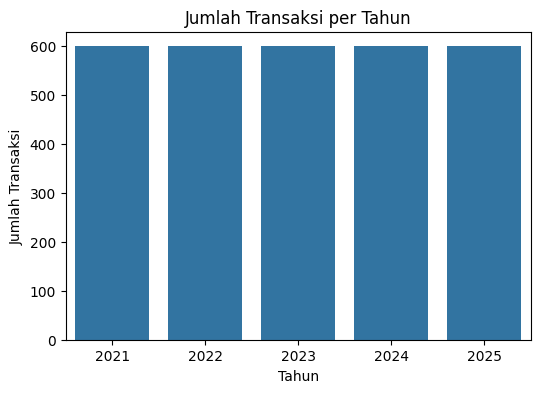

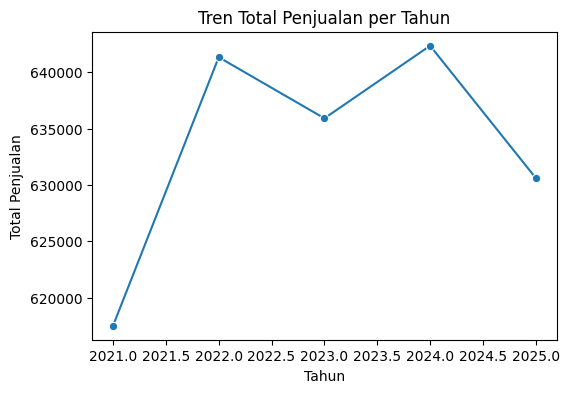

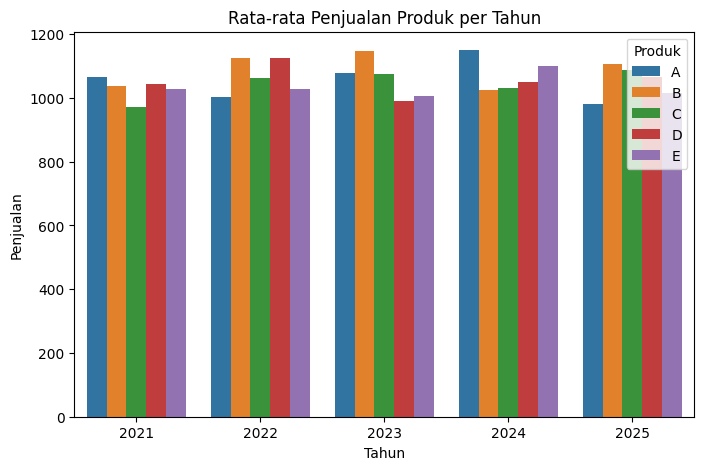

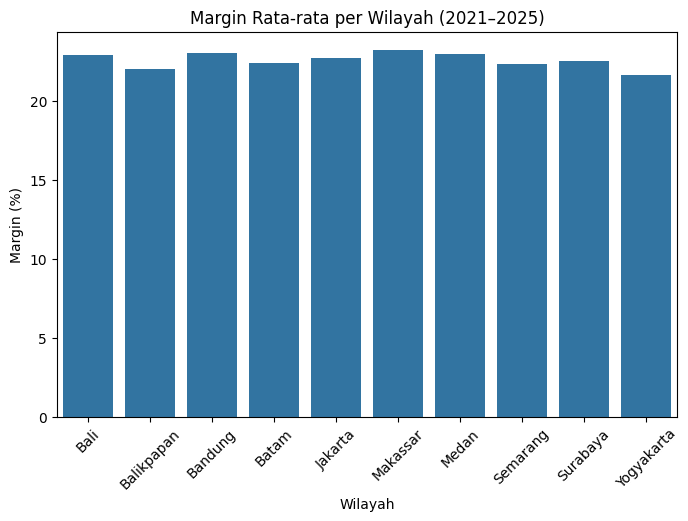

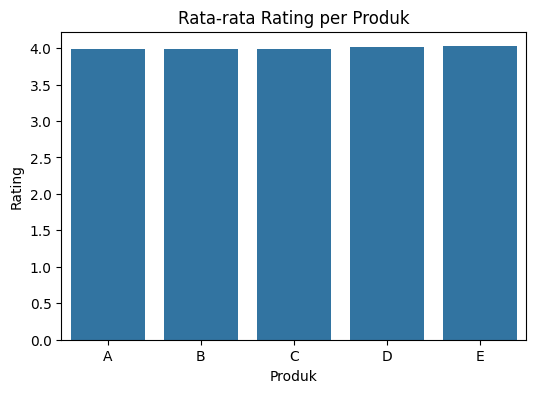

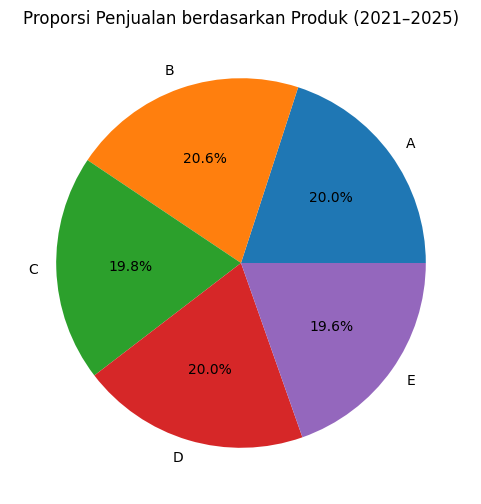

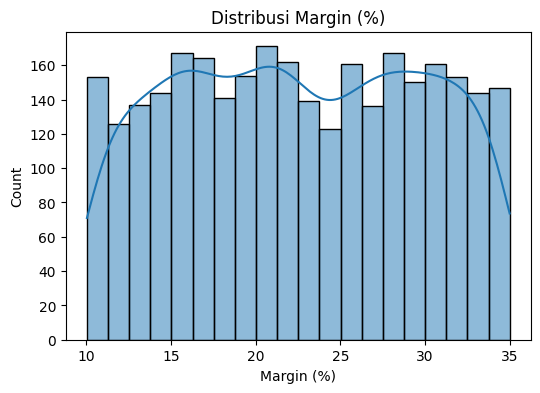

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Jumlah transaksi per tahun
transaksi_tahunan = df.groupby('Tahun').size()
plt.figure(figsize=(6,4))
sns.barplot(x=transaksi_tahunan.index, y=transaksi_tahunan.values)
plt.title("Jumlah Transaksi per Tahun")
plt.ylabel("Jumlah Transaksi")
plt.show()

# 2. Tren total penjualan per tahun
penjualan_tahunan = df.groupby('Tahun')['Penjualan'].sum()
plt.figure(figsize=(6,4))
sns.lineplot(x=penjualan_tahunan.index, y=penjualan_tahunan.values, marker="o")
plt.title("Tren Total Penjualan per Tahun")
plt.ylabel("Total Penjualan")
plt.show()

# 3. Produk dengan penjualan rata-rata tertinggi per tahun
penjualan_produk = df.groupby(['Tahun','Produk'])['Penjualan'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=penjualan_produk, x="Tahun", y="Penjualan", hue="Produk")
plt.title("Rata-rata Penjualan Produk per Tahun")
plt.show()

# 4. Margin rata-rata antar wilayah
margin_wilayah = df.groupby('Wilayah')['Margin (%)'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=margin_wilayah, x="Wilayah", y="Margin (%)")
plt.title("Margin Rata-rata per Wilayah (2021–2025)")
plt.xticks(rotation=45)
plt.show()

# 5. Rating produk antar produk
rating_produk = df.groupby('Produk')['Rating'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(data=rating_produk, x="Produk", y="Rating")
plt.title("Rata-rata Rating per Produk")
plt.show()

# 6. Proporsi total penjualan berdasarkan produk
penjualan_produk_total = df.groupby('Produk')['Penjualan'].sum()
plt.figure(figsize=(6,6))
plt.pie(penjualan_produk_total, labels=penjualan_produk_total.index, autopct='%1.1f%%')
plt.title("Proporsi Penjualan berdasarkan Produk (2021–2025)")
plt.show()

# 7. Distribusi margin (%)
plt.figure(figsize=(6,4))
sns.histplot(df['Margin (%)'], bins=20, kde=True)
plt.title("Distribusi Margin (%)")
plt.show()